In [1]:
import pylab as pl
import numpy as np
import scipy as sp
import scipy.optimize as spo
import pandas as pd
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import csv
import tensorflow as tf
from tensorflow import keras

In [ ]:
#filename = 'np_lin_c_100.csv'
#filename1 = 'np_circ_c_100.csv'

# train the LSTM

batch_x_train = []
batch_y_train = []

df_1 = pd.read_csv('np_lin_100.csv')

for index, rows in df_1.iterrows():
    batch_y_train.append(0)
    list_1 = rows
    batch_x_train.append(list_1)
    
df_2 = pd.read_csv('np_circ_100.csv')            

for index, rows in df_2.iterrows():
    batch_y_train.append(1)
    list_2 = rows
    batch_x_train.append(list_2)

#batch_x_train = tf.keras.utils.to_categorical(batch_x_train) #turn this into a tensor not categorical
batch_x_train = tf.convert_to_tensor(batch_x_train, dtype=tf.float32) 
#batch_x_train = np.asarray(batch_x_train, dtype=object)
batch_y_train = tf.keras.utils.to_categorical(batch_y_train, num_classes=2)
batch_y_test = batch_y_train

batch_x_test = []

df_3 = pd.read_csv('np_t_lin_100.csv')

for index, rows in df_3.iterrows():
    list_3 = rows
    batch_x_test.append(list_3)
    
df_4 = pd.read_csv('np_t_circ_100.csv')
for index, rows in df_4.iterrows():
    list_4 = rows
    batch_x_test.append(list_4)
    
batch_x_test = tf.convert_to_tensor(batch_x_test, dtype=tf.float32)

lr = 1e-2
num_nodes = 6
num_classes = 2
num_epochs = 400
timesteps = 71
tf.keras.backend.clear_session()
X = tf.keras.Input(name='X', shape=[batch_x_train.shape[1],1], dtype=tf.dtypes.float32)
lstm_output = tf.keras.layers.LSTM(num_nodes)(X)
prediction = tf.keras.layers.Dense(num_classes)(lstm_output)
opt = tf.keras.optimizers.Adam(learning_rate=lr)
model = keras.Model(inputs=X, outputs=prediction)
model.compile(optimizer=opt, loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),metrics=['accuracy'])
model.fit(x=batch_x_train, y=batch_y_train, epochs=num_epochs, validation_data=(batch_x_test,batch_y_test))

In [12]:
batch_x_val = []
df_3 = pd.read_csv('np_lin_400.csv')
for index, rows in df_3.iterrows():
    list_3 = rows
    batch_x_val.append(list_3)
    
df_4 = pd.read_csv('np_circ_400.csv')
for index, rows in df_4.iterrows():
    list_4 = rows
    batch_x_val.append(list_4)
    
batch_x_val = tf.convert_to_tensor(batch_x_val, dtype=tf.float32)

16/16 [==============================] - 0s 5ms/step


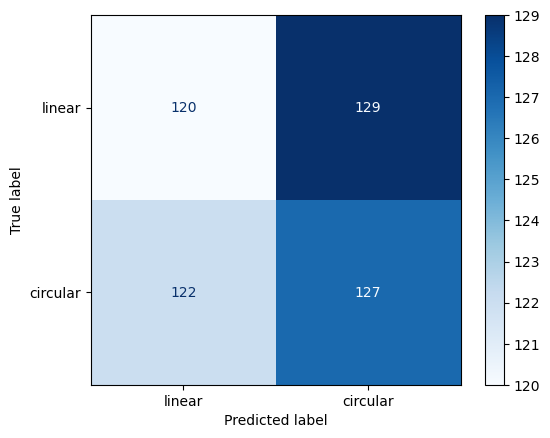

In [13]:
y_prediction = model.predict(batch_x_val)
y_prediction = np.argmax(y_prediction, axis=1)
y_test = np.argmax(batch_y_train, axis=1)
result = tf.math.confusion_matrix(y_test, y_prediction, num_classes=2, weights=None)
labels = ["linear", "circular"]
cm = confusion_matrix(y_test, y_prediction)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [ ]:
labels = ["linear", "circular"]
cm = confusion_matrix(y_test, y_prediction)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [5]:
batch_x_train_2 = []
batch_y_train_2 = []

df_3 = pd.read_csv('big_boi_s_1.csv', nrows=498)

for index, rows in df_3.iterrows():
    list_3 = rows
    batch_x_train_2.append(list_3)
    
#batch_x_train = tf.keras.utils.to_categorical(batch_x_train) #turn this into a tensor not categorical
batch_x_train_2 = tf.convert_to_tensor(batch_x_train_2, dtype=tf.float32)

In [6]:
y_prediction = model.predict(batch_x_train_2)
y_prediction = np.argmax (y_prediction, axis =1)
y_test = np.argmax(batch_y_train, axis=1)
result = tf.math.confusion_matrix(y_test, y_prediction, num_classes=2, weights=None)
print(result)

16/16 [==============================] - 0s 3ms/step
tf.Tensor(
[[141 108]
 [163  86]], shape=(2, 2), dtype=int32)


In [7]:
res1 = y_prediction
res2 = res1.reshape(1,498)
results = np.concatenate((batch_x_train_2, res2.T), axis=1)

In [9]:
np.savetxt("big_boi_1_t.csv", results,
              delimiter = ",")

In [ ]:
model = keras.models.load_model('NP_LSTM.keras')

In [9]:
batch_x_train = []
batch_y_train = []

df_1 = pd.read_csv('np_lin_100.csv')
#df_1 = df_1.drop('101', axis=1)
#lst_0 = [0]*100
#lst_1 = [1]*100

for index, rows in df_1.iterrows():
    batch_y_train.append(0)
    list_1 = rows
    batch_x_train.append(list_1)
    
df_2 = pd.read_csv('np_circ_100.csv')            

for index, rows in df_2.iterrows():
    batch_y_train.append(1)
    list_2 = rows
    batch_x_train.append(list_2)

In [ ]:
#batch_x_train = tf.keras.utils.to_categorical(batch_x_train) #turn this into a tensor not categorical
batch_x_train = tf.convert_to_tensor(batch_x_train, dtype=tf.float32) 
#batch_x_train = np.asarray(batch_x_train, dtype=object)
batch_y_train = tf.keras.utils.to_categorical(batch_y_train, num_classes=2)
batch_y_test = batch_y_train

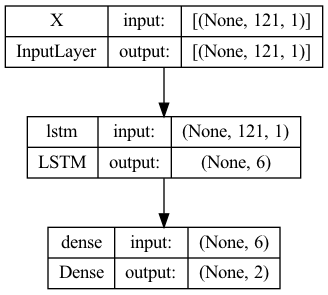

In [3]:
keras.utils.plot_model(model, show_shapes=True)